In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def target_func(x):
    x = x + np.pi/2
    y = -0.3 * x
    return np.sin(x) + y

def dist_func(x):
    return target_func(x) + 0.1*np.random.randn(len(x))

In [14]:
class LinearRegressionSGD():
    def __init__(self, learning_rate=0.001, epochs=3000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.loss_list = []

    def fit(self, x, y, importance=None):
        n_samples = len(x)
        self.theta = np.ones((1, 2))
        self.importance = importance

        x_b = np.c_[np.ones((n_samples, 1)), x]

        for epoch in range(self.epochs):
            loss = 0
            indeces = np.random.permutation(n_samples)
            for i in indeces:
                xi = x_b[i:i+1]
                yi = y[i:i+1]

                if self.importance is not None:
                    importancei = importance[i:i+1]
                else:
                    importancei = 1

                gradients = -2 * (yi - np.dot(xi, self.theta.T)) * importancei

                self.theta[0,0] -= self.learning_rate * gradients # bias term
                self.theta[0,1] -= self.learning_rate * gradients * xi[0,1] # coefficient term

                loss += (yi - np.dot(xi, self.theta.T))**2
            self.loss_list.append(loss / n_samples)

    def predict(self, x):
        x_b = np.c_[np.ones((x.shape[0], 1)), x]
        return np.dot(x_b, self.theta.T)

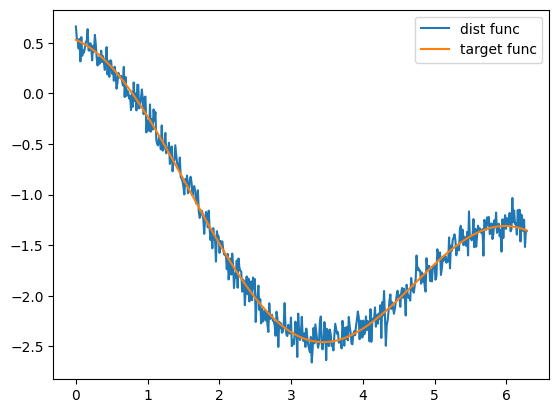

In [20]:
x = np.linspace(0, 2*np.pi, 500)
plt.plot(x, dist_func(x), label='dist func')
plt.plot(x, target_func(x), label='target func')
plt.legend()
plt.show()

In [16]:
class NormDist():
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def normal_pdf(self, x):
        return (1 / (np.sqrt(2 * np.pi) * self.sigma)) * np.exp(-0.5 * ((x - self.mu) / self.sigma)**2)

    def sample(self, n_samples):
        return np.random.normal(self.mu, self.sigma, n_samples)

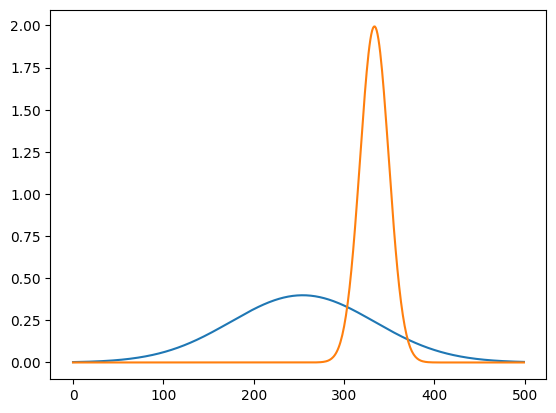

In [17]:
train_x_dist = NormDist(3.2, 1)
test_x_dist =  NormDist(4.2, 0.2)
plt.plot(train_x_dist.normal_pdf(x))
plt.plot(test_x_dist.normal_pdf(x))

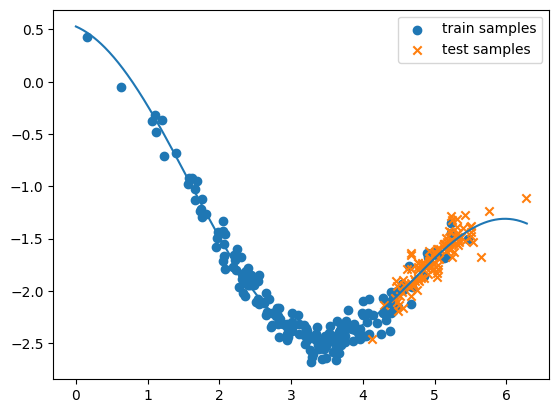

In [25]:
train_x_dist = NormDist(3.2, 1)
test_x_dist =  NormDist(5, 0.3)
plt.plot(x, target_func(x))

train_x = train_x_dist.sample(200)
test_x  = test_x_dist.sample(100)

plt.scatter(train_x, dist_func(train_x), marker='o', label='train samples')
plt.scatter(test_x,  dist_func(test_x), marker='x', label='test samples')
plt.legend()
plt.show()

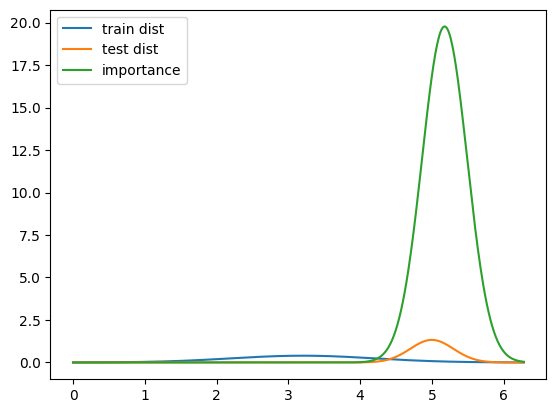

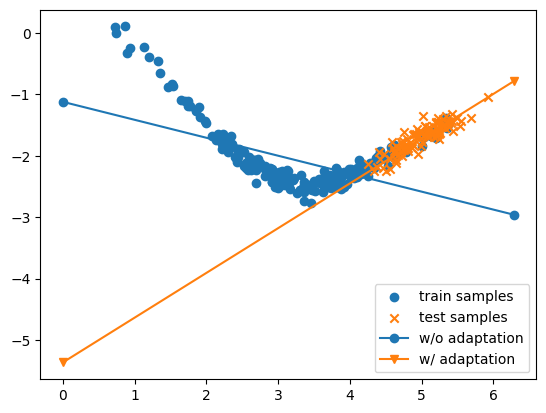

In [19]:
array = np.array([0,2*np.pi])

train_x_dist = NormDist(3.2, 1)
test_x_dist =  NormDist(5, 0.3)

train_x = train_x_dist.sample(200)
test_x  = test_x_dist.sample(100)

plt.plot(x, train_x_dist.normal_pdf(x), label='train dist')
plt.plot(x, test_x_dist.normal_pdf(x), label='test dist')
importance = test_x_dist.normal_pdf(x) / (train_x_dist.normal_pdf(x) + 1e-9)
plt.plot(x, importance, label='importance')
plt.legend()
plt.show()

plt.scatter(train_x, dist_func(train_x), label='train samples', marker='o')
plt.scatter(test_x,  dist_func(test_x), label='test samples', marker='x')

model = LinearRegressionSGD()
model.fit(train_x, dist_func(train_x))
plt.plot(array, model.predict(array), label='w/o adaptation', marker='o')

model = LinearRegressionSGD()
importance = test_x_dist.normal_pdf(train_x) / (train_x_dist.normal_pdf(train_x) + 1e-9)
model.fit(train_x, dist_func(train_x), importance)
plt.plot(array, model.predict(array), label='w/ adaptation', marker='v')
plt.legend()